# kNN Pixelwise Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
from time import time
import gc
from sklearn.externals import joblib

In [2]:
# %load ../../../data_preprocessing/functions.py
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# A function to plot a matrix
def plot_image(data, colorspace='binary'):
    fig = plt.figure(figsize=(10,10)) 
    ax = fig.add_subplot(111)
    ax.imshow(data, cmap=colorspace)
    
    
def normalize_array(array):
    array_min = array.min(axis=(0, 1), keepdims=True)
    array_max = array.max(axis=(0, 1), keepdims=True)
    normalized_array = (array - array_min)/(array_max - array_min)
    
    return normalized_array

def normalize_with_preset(array, max_value, min_value):
    normalized_array = (array - min_value)/(max_value - min_value)
    
    return normalized_array


def recreate_image(labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = labels[label_idx]
            label_idx += 1
    return image

def overlay_images(image1, image2, colorspace1='binary', colorspace2='magma', transparency=0.5):
    plt.imshow(image1, cmap=colorspace1, interpolation='nearest')
    plt.imshow(image2, cmap=colorspace2, alpha=transparency, interpolation='bilinear')
    plt.show()
    
def flatten_normalize_neighbors(training_set, global_max=233, global_min=69):
    flattened_neighbors = []
    neighbors = training_set['neighbors']

    for i in range(len(neighbors)):
        numpy_array = np.array(neighbors[i]).reshape(-1, 1)
        normalized_neighbors = normalize_with_preset(numpy_array, global_max, global_min)
        flattened_neighbors.append(normalized_neighbors)
    
    return np.array(flattened_neighbors).reshape((len(flattened_neighbors), -1))

def extract_values_from_training_data_locations(training_data, image_channel):
    data_values = []
    
    for row in training_data:
        data_values.append(np.array([(image_channel[row[0], row[1]]), row[2]]))
        
    data_values = np.array(data_values)
    
    return data_values

## Initialize the kNN algorithm

In [3]:
classifier_with_b = joblib.load('./knn_trained_with_indios_a.pkl') 

## Load up the orthomosaic

In [5]:
image_data = np.load("../../../../data_preprocessing/data_preprocessing/numpy_data/indios_a/normalized_filtered_rgb.npy")#[0:6000, 0:6000, :]
hsv_data = np.load("../../../../data_preprocessing/data_preprocessing/numpy_data/indios_a/normalized_filtered_hsv.npy")#[0:6000, 0:6000, :]

In [9]:
subset_rgb = image_data[0:6000, 0:6000, :]
subset_hsv = hsv_data[0:6000, 0:6000, :]

In [11]:
multidimensional_ortho = np.dstack((subset_rgb, subset_hsv))

In [12]:
multidimensional_ortho.shape

(6000, 6000, 6)

In [13]:
w, h, c = tuple(multidimensional_ortho.shape)

In [16]:
reshaped_ortho = multidimensional_ortho.reshape(-1, c)

In [19]:
predicted_image = np.zeros((w, h))

In [21]:
t0 = time()
labels = classifier_with_b.predict(reshaped_ortho)
print("done in %0.3fs." % (time() - t0))

In [25]:
t0 = time()
image = recreate_image(labels, w, h)
print("done in %0.3fs." % (time() - t0))

done in 11.336s.


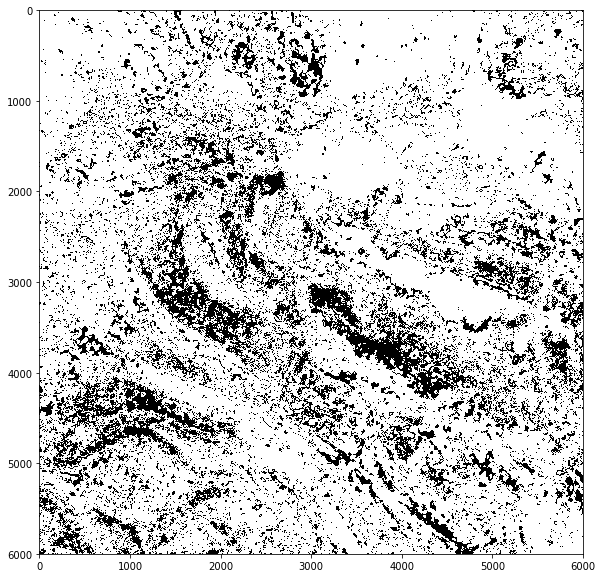

In [27]:
plot_image(image)

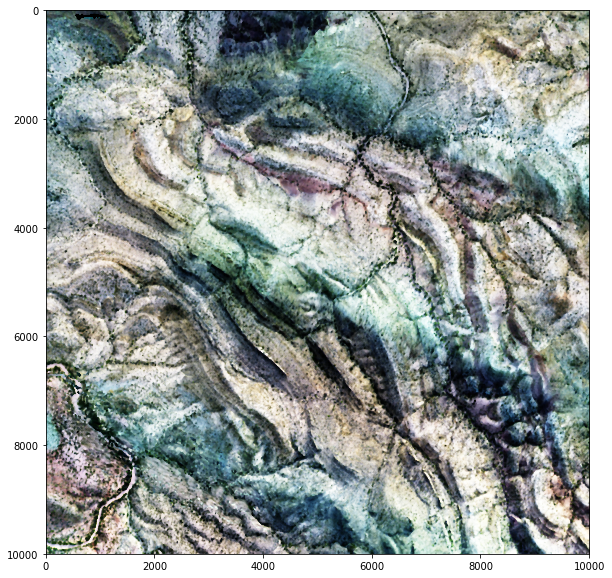

In [28]:
plot_image(image_data)

In [29]:
from skimage.filters.rank import median
from skimage.morphology import disk, binary_dilation, closing, binary_erosion, binary_opening

In [30]:
dil = binary_dilation(image, selem=disk(5))

In [31]:
ope = binary_opening(dil, selem=disk(4))

In [36]:
med = median(dil, disk(15))

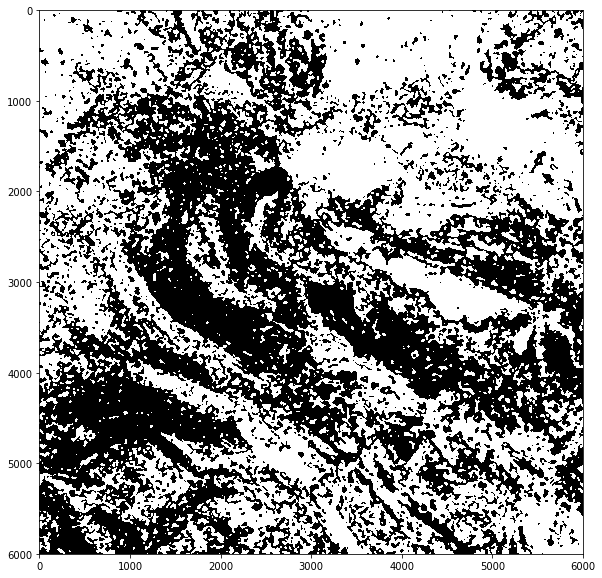

In [37]:
plot_image(med)

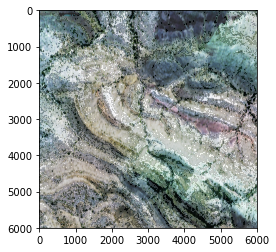

In [50]:
overlay = overlay_images(med, subset_rgb, transparency=0.85)

AttributeError: 'NoneType' object has no attribute 'shape'

In [55]:
import scipy.misc
scipy.misc.imsave('knn_indios_a_trained_with_b.jpg', med)
scipy.misc.imsave('knn_indios_a.jpg', subset_rgb)

In [ ]:
# t0 = time()
# prediction_map = np.zeros((w, h))
# for i in range(20, w-20):
#     for j in range(20, h-20):
#         test = test_mosaic[i-20:i+20, j-20:j+20].reshape(1, -1)
# #         print(i, j)
#         prediction = classifier.predict(test)
#         prediction_map[i][j] = prediction[0]
# print("done in %0.3fs." % (time() - t0))